In [3]:
import numpy as np
import glob
import os, re
import cv2
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime

In [2]:
!pwd

/Users/tomi/Astronomy/MTA_CSFK/ML_OGLE/test


In [4]:
dir = "/Users/tomi/Astronomy/MTA_CSFK/ML_OGLE/OGLE3/test/testdata_nocolor"

In [5]:
datafiles = []
datafiles = sorted(glob.glob(dir + "/*.png"))
print("Number of samples: ", len(datafiles))

Number of samples:  5000


In [6]:
datasize = len(datafiles)
train_setsize = 0.8
test_setsize = 0.2
# validate_setsize = 0.2
img_size = 128
batch = 32
epoch_number = 25

# labels = []
# for i in datafiles:
#     label = os.path.basename(i).split("_")[0]
#     if label not in labels:
#         labels.append(label)

# train_set = sorted(random.sample(datafiles, int(datasize*traintest_setsize*traintest_ratio)))
# control_set = [i for i in datafiles if i not in train]
# test_set = sorted(random.sample(control, int(np.round(datasize*traintest_setsize*(1-traintest_ratio)))))
# control_set = [i for i in control_set if i not in test]

X = []
y = []

for i in datafiles:
    datafile = cv2.imread(i) / 255.
    if datafile.shape[0] != datafile.shape[1]:
        datafile = cv2.resize(datafile,(img_size,img_size))
    label = os.path.basename(i).split("_")[0]
    X.append(datafile)
    y.append(label)

X=np.array(X)
y=np.array(y)

In [ ]:
#print("Datasize:", datasize)
#print("Train files:", len(train_set))
#print("Test files:", len(test_set))
#print("Control files:", len(control_set))


In [7]:
import sklearn.preprocessing
encoder = sklearn.preprocessing.OneHotEncoder(sparse=False)

encoder.fit(y.reshape(-1,1))
y_enc = encoder.transform(y.reshape(-1,1))

In [8]:
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y_enc, 
                                                                            shuffle=True, 
                                                                            stratify=y, 
                                                                            train_size = train_setsize,
                                                                            test_size=test_setsize, 
                                                                            random_state=42)

(n_sampl, x_dim, y_dim, channels) = X_train.shape


In [ ]:
print(len(X_train))

In [ ]:
# from keras import Sequential
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Dense, Dropout, Flatten

# model = Sequential()
# model.add( Conv2D(16, (3,3), activation='relu', data_format='channels_last', input_shape=(x_dim, y_dim, channels)))
# model.add( Conv2D(16, (3,3), activation='relu'))
# model.add( MaxPooling2D( pool_size=(2,2) ) )
# model.add( Dropout(0.1) )

# model.add( Conv2D(32, (3,3), activation='relu'))
# model.add( Conv2D(32, (3,3), activation='relu'))
# model.add( MaxPooling2D( pool_size=(2,2) ) )
# model.add( Dropout(0.1) )

# model.add( Conv2D(64, (3,3), activation='relu'))
# model.add( Conv2D(64, (3,3), activation='relu'))
# model.add( MaxPooling2D( pool_size=(2,2) ) )
# model.add( Dropout(0.1) )

# model.add( Flatten() )
# model.add( Dense(128, activation='relu'))
# model.add( Dropout(0.5))

# model.add( Dense(5, activation='softmax'))

In [ ]:
# # Darknet sample network for CIFAR-10 dataset

# from keras import Sequential
# from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
# from keras.layers import Flatten,Dense,Dropout

# model = Sequential()
# model.name="CIFAR-10 dataset"
# #model.add( Conv2D(32, kernel_size=1, strides=1, activation='relu', data_format='channels_last',input_shape=(x_dim, y_dim, channels)))
# model.add( Conv2D(32, 1, activation='relu', data_format='channels_last',input_shape=(x_dim, y_dim, channels)))

# model.add( MaxPooling2D( pool_size=(2,2) ) )
# # model.add( Dropout(0.1) )

# # model.add( Conv2D(16, kernel_size=1, strides=1, activation='relu'))
# # model.add( Conv2D(64, kernel_size=3, strides=1, activation='relu'))
# model.add( Conv2D(16, 1, activation='relu'))
# model.add( Conv2D(64, 3, activation='relu'))

# model.add( MaxPooling2D( pool_size=(2,2) ) )
# # model.add( Dropout(0.1) )

# # model.add( Conv2D(32, kernel_size=1, strides=1, activation='relu'))
# # model.add( Conv2D(128, kernel_size=3, strides=1, activation='relu'))
# # model.add( Conv2D(64, kernel_size=3, strides=1, activation='relu'))
# # model.add( Conv2D(5, kernel_size=3, strides=1, activation='relu'))
# model.add( Conv2D(32, 1, activation='relu'))
# model.add( Conv2D(128, 3, activation='relu'))
# model.add( Conv2D(64, 3, activation='relu'))
# #model.add( Conv2D(5, 3, activation='relu'))

# model.add( AveragePooling2D( pool_size=(2,2) ))
# # model.add( Dropout(0.1) )

# #keras.activations.softmax(x, axis=-1)
# model.add( Flatten() )

# model.add( Dense(5, activation='softmax'))
# # model.add( Dropout(0.1) )

In [9]:
# Test network version 0.1

# from keras import Sequential
# from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
# from keras.layers import Flatten,Dense,Dropout

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Flatten,Dense,Dropout

model = Sequential()
# model = "Test v0.2"
#model.add( Conv2D(32, kernel_size=1, strides=1, activation='relu', data_format='channels_last',input_shape=(x_dim, y_dim, channels)))
model.add( Conv2D(16, 8, activation='relu', data_format='channels_last',input_shape=(x_dim, y_dim, channels)))
model.add( MaxPooling2D( pool_size=(2,2) ) )

model.add( Conv2D(32, 4, activation='relu'))
model.add( MaxPooling2D( pool_size=(2,2) ) )

model.add( Conv2D(64, 2, activation='relu'))
model.add( MaxPooling2D( pool_size=(2,2) ) )

model.add( Conv2D(128, 1, activation='relu'))
model.add( MaxPooling2D( pool_size=(2,2) ) )

model.add( Conv2D(256, 1, activation='relu'))
model.add( MaxPooling2D( pool_size=(2,2) ) )

# model.add( Dropout(0.1) )

#keras.activations.softmax(x, axis=-1)
model.add( Flatten() )

model.add( Dense(256, activation='relu'))
model.add( Dense(256, activation='relu'))
model.add( Dense(64, activation='relu'))

model.add( Dense(5, activation='softmax'))
# model.add( Dropout(0.1) )

In [10]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import TensorBoard
# import keras.callbacks as cb

log_dir = dir + '/logs/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = TensorBoard(log_dir,histogram_freq=1)
# keras_callback = cb.callbacks.Callback()
# tensorboard_callback = cb.TensorBoard(log_dir=log_dir,
#                                    histogram_freq=1, 
#                                    update_freq='batch')
# cb.callbacks.TerminateOnNaN()
# tensorboard = TensorBoard(log_dir=log_dir)

opt = SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# file_writer = tf.summary.create_file_writer(log_dir)
# keras.summary.
# with file_writer.as_default():
#   for step in range(100):
#     # other model code would go here
#     tf.summary.scalar("Keras v0.1", 0.5, step=step)
#     file_writer.flush()

In [11]:
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          batch_size=batch, 
          verbose=1, 
          epochs=epoch_number,
          callbacks=[tensorboard_callback])

Train on 3750 samples, validate on 1250 samples
Epoch 1/25
3750/3750 [==============================] - 140s 37ms/sample - loss: 1.5925 - accuracy: 0.4021 - val_loss: 1.5697 - val_accuracy: 0.5248
Epoch 2/25
3750/3750 [==============================] - 147s 39ms/sample - loss: 1.4358 - accuracy: 0.5459 - val_loss: 1.1533 - val_accuracy: 0.5960
Epoch 3/25
3750/3750 [==============================] - 122s 33ms/sample - loss: 0.9730 - accuracy: 0.6200 - val_loss: 0.9068 - val_accuracy: 0.6128
Epoch 4/25
3750/3750 [==============================] - 121s 32ms/sample - loss: 0.7792 - accuracy: 0.7005 - val_loss: 1.2987 - val_accuracy: 0.5768
Epoch 5/25
3750/3750 [==============================] - 123s 33ms/sample - loss: 0.6849 - accuracy: 0.7443 - val_loss: 0.9680 - val_accuracy: 0.6376
Epoch 6/25
3750/3750 [==============================] - 128s 34ms/sample - loss: 0.5949 - accuracy: 0.7800 - val_loss: 2.3723 - val_accuracy: 0.4912
Epoch 7/25
3750/3750 [==============================] - 14

In [ ]:
#################
# Saving the model (architecture, weights, training configuration, state of the optimizer)
#################

# model.save('OGLE3_colored.h5')
# model.save('OGLE3_non_colored.h5')

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print ('Loss, accuracy:', test_loss, test_accuracy)


1250/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Loss, accuracy: 0.31728959674835205 0.8856


In [ ]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print ('Loss, accuracy:', test_loss, test_accuracy)

In [23]:
import keras.utils
from keras.utils.vis_utils import plot_model
# import tensorflow.keras.utils.plot_model as modelplot
# tensorflow.keras.utils.
keras.utils.print_summary(model)
plot_model(model, to_file='model.png')


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 121, 121, 16)      3088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 128)       8

TypeError: 'InputLayer' object is not iterable

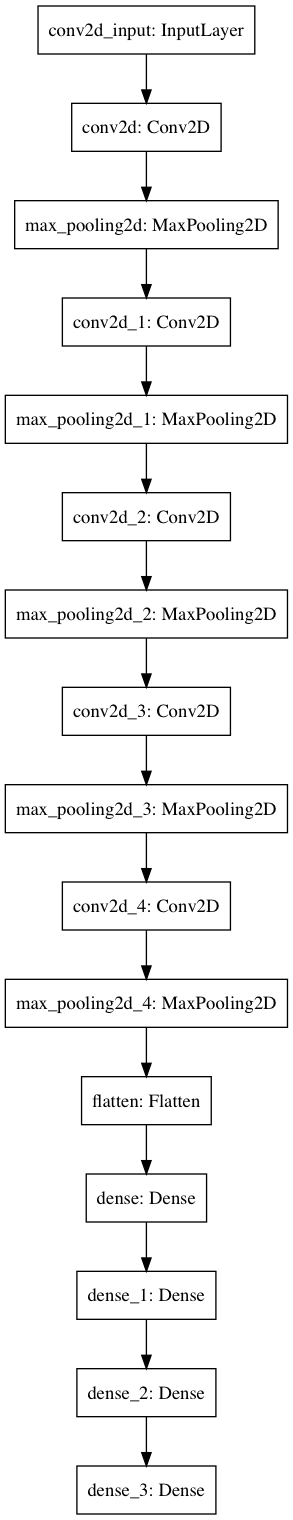

In [31]:
import tensorflow.keras.utils as utils

utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [ ]:
a=encoder.inverse_transform(y_test)
b=model.predict(X_test)
#encoder.transform(np.argmax(b,axis=1))
#print(np.argmax(b[4]),a[4])
#plt.imshow(X_test[4])
#print(b[4], y_test[4])
b[0]

In [ ]:
from keras.preprocessing import image

img = "/Users/tomi/Astronomy/MTA_CSFK/ML_OGLE/ACep/ACEP_LCs/acep_038.png"
# img = "/Users/tomi/Astronomy/MTA_CSFK/ML_OGLE/DSct/DSct_LCs/dsct_2735.png"
img = "/Users/tomi/Astronomy/MTA_CSFK/ML_OGLE/ECL/ECL_LCs_2/01015.png"
# img = "/Users/tomi/Astronomy/MTA_CSFK/ML_OGLE/RRLyr/RRLyr_LCs/rrlyr_01020.png"
# img = "/Users/tomi/Astronomy/MTA_CSFK/ML_OGLE/T2Cep/T2CEP_LCs/t2cep_157.jpg"

# img = cv2.imread(img)
# img = cv2.resize(img,(img_size,img_size))

# img = np.expand_dims(img, axis=0)

# model.predict(img)
img = image.load_img(img, target_size=(img_size, img_size))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
model.predict(img)
model.predict_classes(img)



In [32]:
# from keras.utils.vis_utils import plot_model
# from tensorflow.keras.utils
import pydot

# keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [22]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [ ]:
# Summaries for histogram

k = tf.placeholder(tf.float32)
# Make a normal distribution, with a shifting mean
mean_moving_normal = tf.random_normal(shape=[100], mean=(5*k), stddev=1)
# Record that distribution into a histogram summary
tf.summary.histogram("normal/moving_mean", mean_moving_normal)
